In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
#Reading the spam email CSV file and encoding it in LATIN (English)
df = pd.read_csv("/content/spam.csv",encoding='latin-1')

In [35]:
#Show the head of the Email file
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [36]:
#Now we are going to print the shape of the Dataset
print('Shape of the dataset : ',df.shape)

Shape of the dataset :  (5572, 5)


In [37]:
#drop unnamed columns
#Drop all the unnamed columns
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [38]:
#Check the head of the file
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [40]:
#describe the dataframe
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [41]:
#in the Dataframe we will seprate where we check the spam and ham messages
df.describe().transpose()

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [9]:
#checking for duplicate value
df.duplicated().sum()

403

In [10]:
#removing duplicates
df=df.drop_duplicates(keep='first')

In [45]:
#rename the column
df=df.rename(columns={'v1':'label','v2':'text'})

In [46]:
df.head(1)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."


In [47]:
df.groupby('label').describe().transpose()

label                           ham  \
text count                     4825   
     unique                    4516   
     top     Sorry, I'll call later   
     freq                        30   

label                                                     spam  
text count                                                 747  
     unique                                                653  
     top     Please call our customer service representativ...  
     freq                                                    4

In [48]:
#checking for null values
df.isnull().sum()

label    0
text     0
dtype: int64

In [49]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: ylabel='label'>

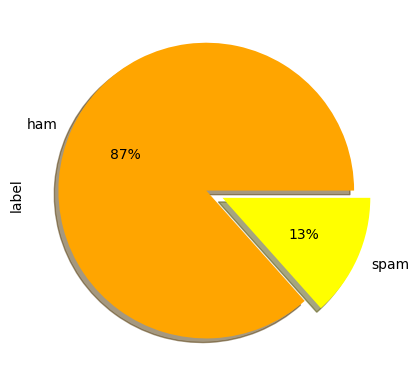

In [50]:
#Here yellow colour represents spam and orange colour represents ham
plot_df = df.label.value_counts()
colors = ['orange','yellow']
explode=(0.06,0.06)
plot_df.plot(kind="pie",shadow=True,explode=explode,colors=colors,autopct='%1.0f%%')

In [51]:
#convert categorical value into numerical in label column
#We encode the spam label as 1
#And Encode the ham label as 0
df.loc[df['label']=='spam','label']=1
df.loc[df['label']=='ham','label']=0

In [19]:
#For balancing the dataset

from sklearn.utils import resample

df_largeset=df[df['label']==0]
df_smallset=df[df['label']==1]
#resmapling with replacement
df_smallset_upsampled=resample(df_smallset,replace=True,n_samples=4825,random_state=0)
df=pd.concat([df_largeset,df_smallset_upsampled])

In [20]:
df['label'].value_counts()

1    4825
0    4516
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

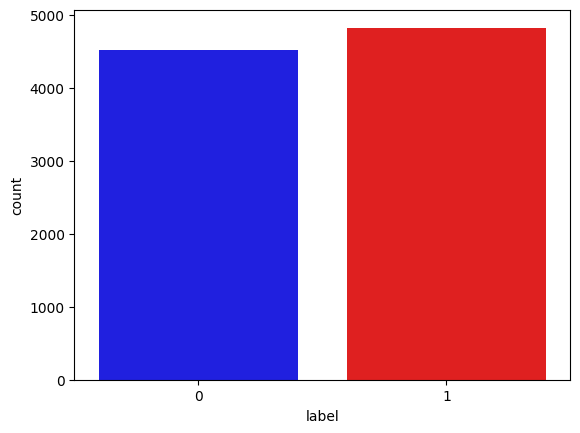

In [22]:
sns.countplot(x='label',data=df,palette=['b','r'])

In [23]:
X=df['text']
y=df['label']

In [24]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)

In [25]:
#importing libraries for nlp
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [26]:
#using TFIDF
vect=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [27]:
X_train_vect=vect.fit_transform(X_train)
X_test_vect=vect.transform(X_test)

In [28]:
#label column is in object type we need to convert it into integer
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
model=MultinomialNB()
model.fit(X_train_vect,y_train)

MultinomialNB()

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
pred=model.predict(X_test_vect)
acc=accuracy_score(y_test,pred)
print('Accuracy: ',acc.round(4)*100,'%')

Accuracy:  97.75 %


(-0.5, 949.5, 399.5, -0.5)

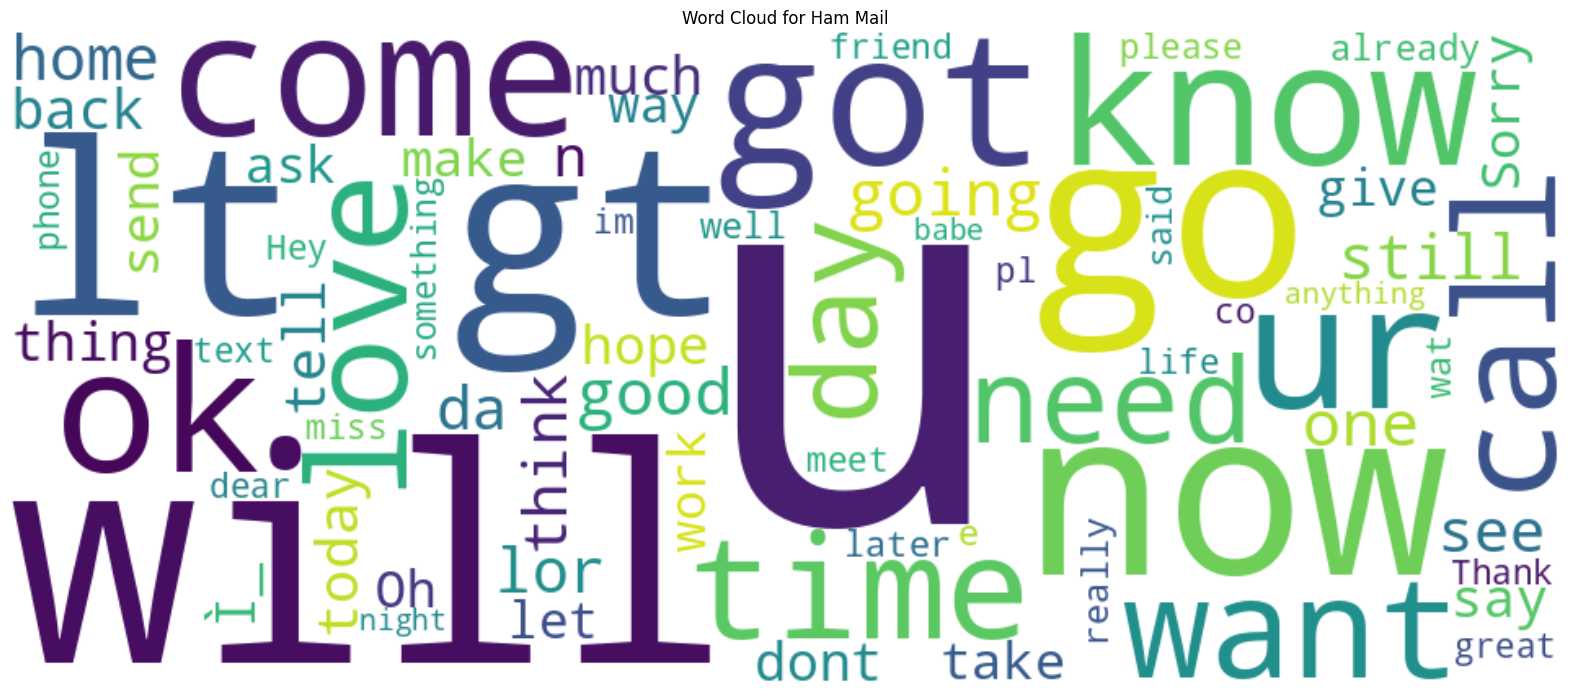

In [33]:
from wordcloud import WordCloud
wordcloud1=WordCloud(background_color='white',max_words=70,width=950,height=400).generate(''.join(df_largeset.text))

plt.figure(figsize=(20,10))
plt.title('Word Cloud for Ham Mail')
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis('off')